<a href="https://colab.research.google.com/github/Chiraz32/Deep-Learning-Labs/blob/main/TP1_BEN_MBAREK__Ranim_DOSS_Chiraz_SEDDIK_Farah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algorithme :
soit :
* n : nombre d'exemples dans l'ensemble d'entraînement
* d : nombre de caractéristiques (features) dans chaque exemple
* t : nombre d'itérations nécessaires pour que le perceptron converge

###1- Complexité en temps : O (n* d * t)

=>  la complexité en temps est proportionnelle au nombre d'itérations nécessaires multiplié par le produit du nombre d'exemples et du nombre de caractéristiques.

###2- Compelxité en espace : O(d)
 le perceptron doit stocker les poids associés à chaque caractéristique, et non pas en fonction du nombre d'exemples (98-n).

### I. Exercice1

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

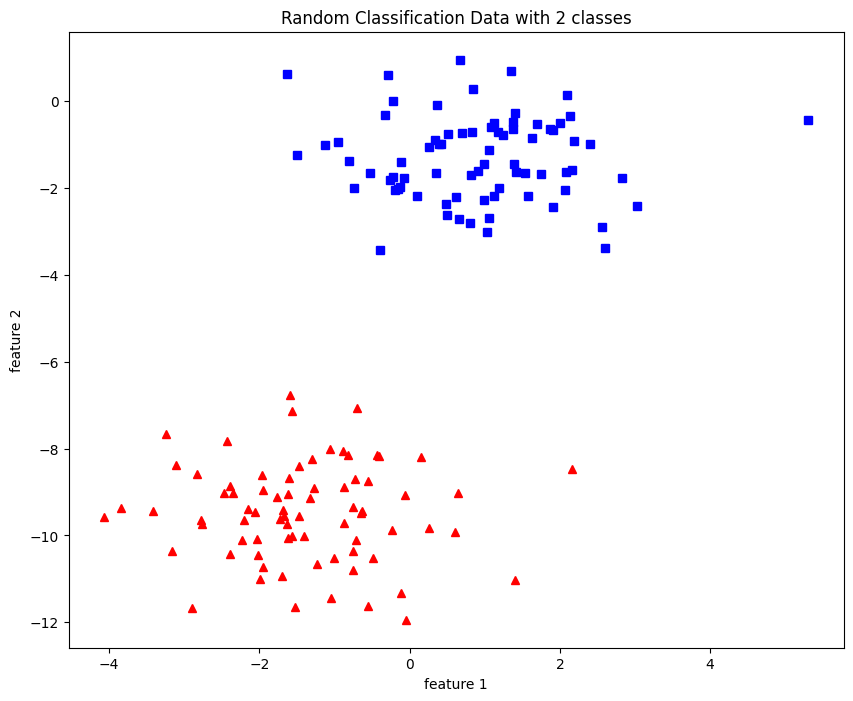

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
X,y = datasets.make_blobs(n_samples=150,n_features=2,
                         centers=2,cluster_std=1.05,
                         random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def acti_func(z):
  if z > 0 :
    return 1.0
  else:
    return 0.0

In [ ]:
import numpy as np


def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  #m: 150, n=2 =150*2
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  # Training.
  for epoch in range(epochs):
  # variable to store #misclassified.
    n_miss = 0

  # looping for every example. idx; idice du example , x_i=valeur feature (f1,f2)
    for idx, x_i in enumerate(X):
    # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
    # Calculating prediction/hypothesis. xi*w
      y_hat = acti_func(np.dot(x_i.T, w))
    # Updating if the example is misclassified.  / squeeze 2*1 = output 2
      if (np.squeeze(y_hat) - y[idx]) != 0:
        w = w + lr * (y[idx] -y_hat) * x_i

    #Incrementing by 1.
        n_miss += 1

    # Appending number of misclassified examples
    # at every iteration.
    n_miss_list.append(n_miss)
  return w, n_miss_list

In [ ]:
def plot_decision_boundary(X,w,with_plot):
    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2 = - (w[0] + w[1] * x1) / w[2]

    #Plotting
    if with_plot==True:
      fig = plt.figure(figsize=(10,8))
      #plot for class 0
      plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
      #plot for class 1
      plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
      plt.xlabel("feature 1")
      plt.ylabel("feature 2")
      plt.title('Perceptron Algorithm')
    plt.plot(x1,x2,'k-')


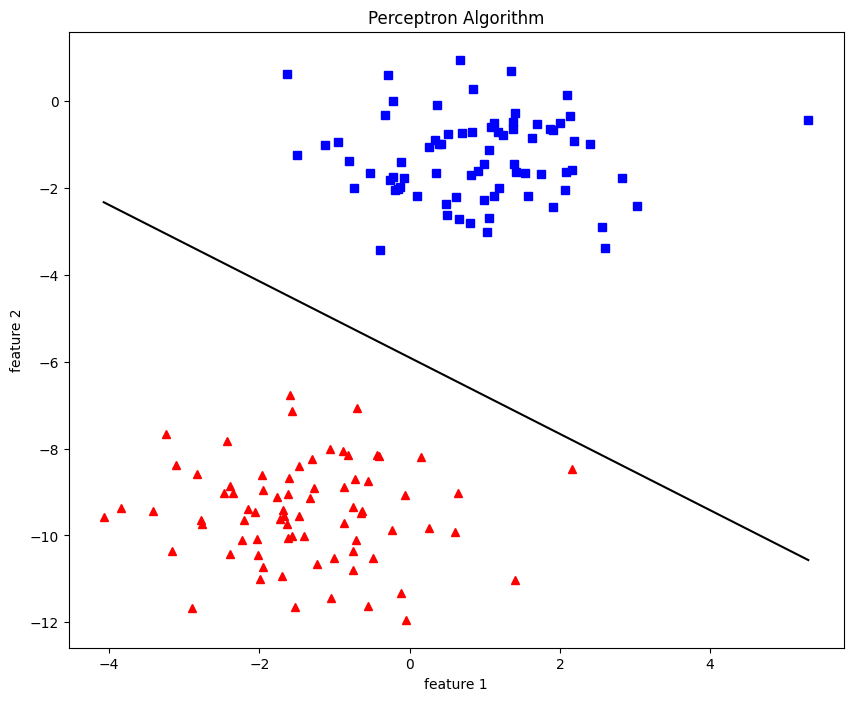

In [ ]:
plot_decision_boundary(X, perceptron(X, y, 0.01, 10)[0],True)

###II. Exercice2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def generate_dataset(sigma1,sigma2, size):
    mu1 = np.array([-1, 0])
    mu2 = np.array([1, 0])
    np.random.seed(42)
    X1 = np.random.normal(mu1, sigma1, size=(size, 2))
    X2 = np.random.normal(mu2, sigma2, size=(size, 2))
    y1 = -np.ones(size)
    y2 = np.ones(size)
    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))
    X, y = shuffle(X, y, random_state=42)
    return X, y

def run_single_experiment(sigma1,sigma2, size):
    X, y = generate_dataset(sigma1,sigma2, size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test,X,y

def plot_decision_boundary_2(X, X_train,y_train,y):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
    plt.title('Decision Boundary - Experiment')
    plot_decision_boundary(X_train,perceptron(X, y, 0.01, 10)[0],False)
    plt.xlim(np.min(X[:,0]),np.max(X[:,0]))
    plt.ylim(np.min(X[:,1]),np.max(X[:,1]))
    plt.show()

def calculate_accuracy(X_test, y_test, w):
    X_test_bias = np.insert(X_test, 0, 1, axis=1)
    y_pred = np.array([acti_func(np.dot(x_i.T, w)) for x_i in X_test_bias])
    accuracy = np.mean(y_pred == y_test)
    return accuracy



##1-Expérience 1

Le nombre d'itérations nécessaires pour converger : 1168


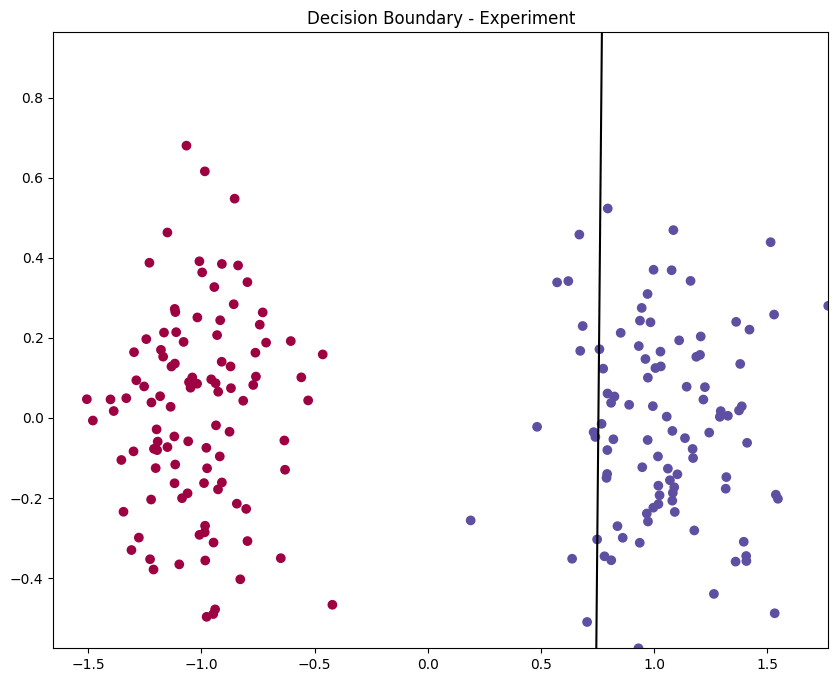

Accuracy on test set: 0.38


In [ ]:
sigma1 = 0.25
sigma2 = 0.25
size = 125
lr = 0.01
epochs = 10

# Exécution de l'expérience
X_train, y_train, X_test, y_test,X,y = run_single_experiment(sigma1,sigma2, size)
w, n_miss_list = perceptron(X_train, y_train, lr, epochs)
print(f"Le nombre d'itérations nécessaires pour converger : {np.sum(n_miss_list)}")
plot_decision_boundary_2(X, X_train,y_train,y)
accuracy= calculate_accuracy(X_test, y_test, w)
print(f"Accuracy on test set: {accuracy}")

##2-Expérience 2

Le nombre d'itérations nécessaires pour converger : 1308


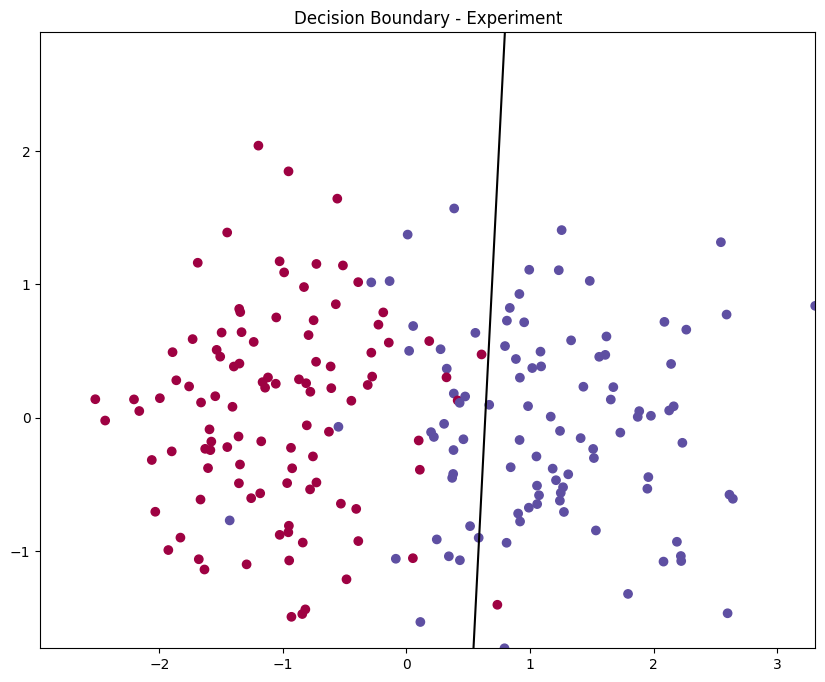

Accuracy on test set: 0.28


In [ ]:
sigma1 = 0.75
sigma2 = 0.75
size = 125
lr = 0.01
epochs = 10

# Exécution de l'expérience
X_train, y_train, X_test, y_test,X,y = run_single_experiment(sigma1,sigma2, size)
w, n_miss_list = perceptron(X_train, y_train, lr, epochs)
print(f"Le nombre d'itérations nécessaires pour converger : {np.sum(n_miss_list)}")
plot_decision_boundary_2(X, X_train,y_train,y)
accuracy= calculate_accuracy(X_test, y_test, w)
print(f"Accuracy on test set: {accuracy}")

##3- Expérience 3

In [ ]:
# Define the main experiment function
def run_experiment(sigma1_squared, sigma2_squared, num_experiments=30):

    # Initialize arrays to store errors from each experiment
    errors = []
    accuracies=[]

    for _ in range(num_experiments):
        X_train, y_train, X_test, y_test,X,y= run_single_experiment(np.sqrt(sigma1_squared),np.sqrt(sigma2_squared), 125)
        w, n_miss_list = perceptron(X_train, y_train, 0.01,10)
        # Calculate accuracy on the test set
        X_test_bias = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.array([acti_func(np.dot(x_i.T, w)) for x_i in X_test_bias])
        accuracy = np.mean(y_pred == y_test)
       # Store the error (1 - accuracy) for this experiment
        errors.append(1 - accuracy)
        accuracies.append(accuracy)

    # Calculate mean and variance of errors
    mean_error = np.mean(errors)
    variance_error = np.var(errors)

    return mean_error, variance_error

# Define the values of sigma1_squared and sigma2_squared
sigmas = [0.01, 0.1, 0.5, 0.7]
variances_Combo_error= []
means_Combo_error=[]
# Run the experiment for each combination of sigma values
for sigma1_squared in sigmas:
    for sigma2_squared in sigmas:
        mean_error, variance_error = run_experiment(sigma1_squared, sigma2_squared)
        means_Combo_error.append(mean_error)
        variances_Combo_error.append(variance_error)
        print(f"*********for sigma 1= {sigma1_squared} , sigma 2= {sigma2_squared} ********")
        print(f"Variance of Error  : {variance_error}**** Mean Error  : {mean_error}")




*********for sigma 1= 0.01 , sigma 2= 0.01 ********
Variance of Error  : 1.232595164407831e-32**** Mean Error  : 0.58
*********for sigma 1= 0.01 , sigma 2= 0.1 ********
Variance of Error  : 0.0**** Mean Error  : 0.62
*********for sigma 1= 0.01 , sigma 2= 0.5 ********
Variance of Error  : 1.232595164407831e-32**** Mean Error  : 0.7199999999999999
*********for sigma 1= 0.01 , sigma 2= 0.7 ********
Variance of Error  : 1.232595164407831e-32**** Mean Error  : 0.7199999999999999
*********for sigma 1= 0.1 , sigma 2= 0.01 ********
Variance of Error  : 1.232595164407831e-32**** Mean Error  : 0.58
*********for sigma 1= 0.1 , sigma 2= 0.1 ********
Variance of Error  : 0.0**** Mean Error  : 0.62
*********for sigma 1= 0.1 , sigma 2= 0.5 ********
Variance of Error  : 1.232595164407831e-32**** Mean Error  : 0.7199999999999999
*********for sigma 1= 0.1 , sigma 2= 0.7 ********
Variance of Error  : 1.232595164407831e-32**** Mean Error  : 0.7199999999999999
*********for sigma 1= 0.5 , sigma 2= 0.01 ****

In [ ]:
print (means_Combo_error)
means_Combo_error[:4]

[0.58, 0.62, 0.7199999999999999, 0.7199999999999999, 0.58, 0.62, 0.7199999999999999, 0.7199999999999999, 0.58, 0.62, 0.7199999999999999, 0.7199999999999999, 0.58, 0.62, 0.7199999999999999, 0.7199999999999999]


[0.58, 0.62, 0.7199999999999999, 0.7199999999999999]

-4 0


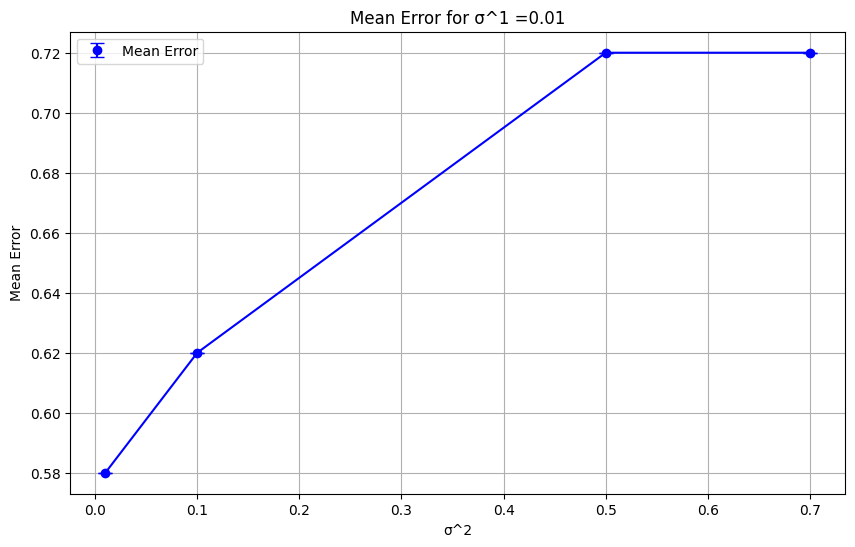

0 4


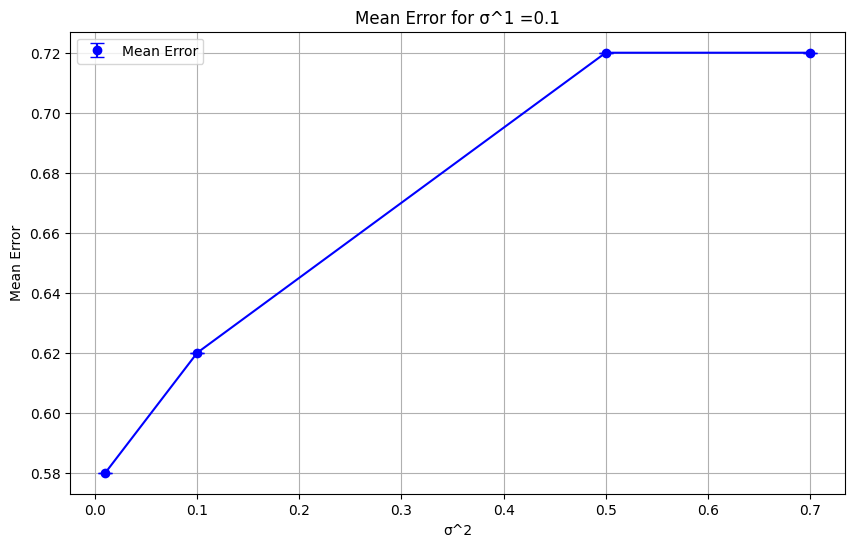

4 8


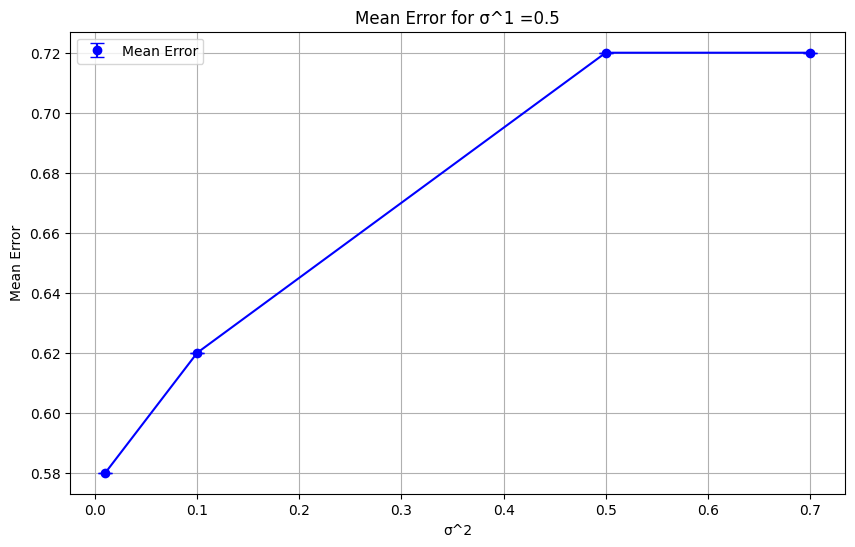

8 12


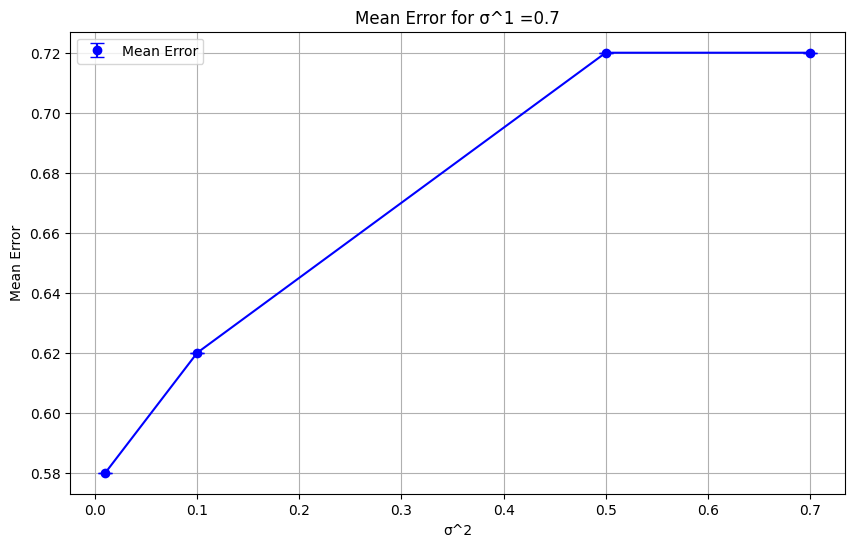

In [ ]:
def plot(sigma,i,j):
    plt.figure(figsize=(10, 6))

    plt.errorbar(sigmas, means_Combo_error[i:j], yerr=np.sqrt(variances_Combo_error[i:j]), color='b', ecolor='blue', capsize=5,fmt='o', label='Mean Error')
    plt.plot(sigmas, means_Combo_error[i:j], linestyle='-', marker='', color='blue')

    plt.xlabel('σ^2')
    plt.ylabel('Mean Error')
    plt.title(f'Mean Error for σ^1 ={sigma}')
    plt.legend()
    plt.grid(True)
    plt.show()

i=-4
j=0
for sigma in sigmas:
  print (i,j)
  plot(sigma,i+4,j+4)
  i+=4
  j+=4

In [ ]:
# Run the experiment for each combination of sigma values
def statics(sigmas):
  variances_error= []
  means_error=[]
  for sigma in sigmas:
        mean_error, variance_error=run_experiment(sigma, sigma, num_experiments=30)
        means_error.append(mean_error)
        variances_error.append(variance_error)
  return variances_error,means_error
variances_error,means_error=statics(sigmas)

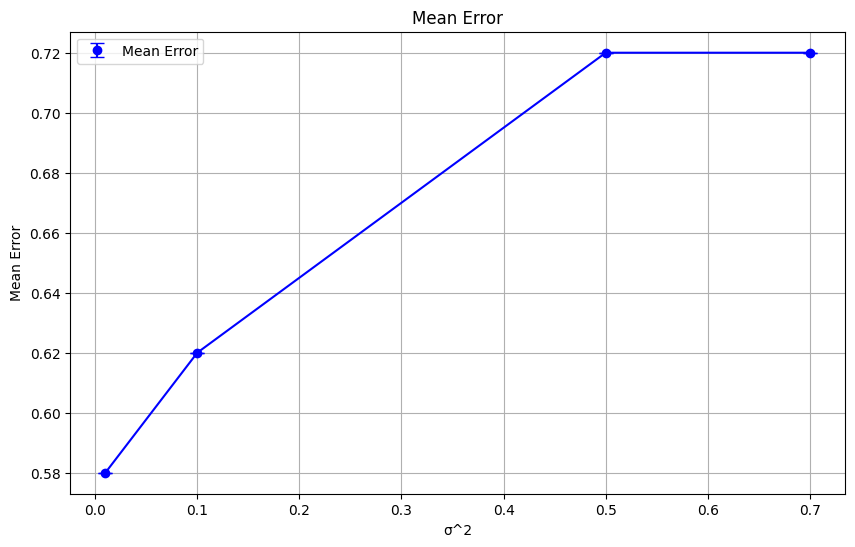

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(sigmas, means_error, yerr=np.sqrt(variances_error), color='b', ecolor='blue', capsize=5,fmt='o', label='Mean Error')
plt.plot(sigmas, means_error, linestyle='-', marker='', color='blue')

plt.xlabel('σ^2')
plt.ylabel('Mean Error')
plt.title('Mean Error')
plt.legend()
plt.grid(True)
plt.show()